# Rejection sampling demo


<code>Code</code> by Prof. Caarl Scheffler

<code>Session 12.1</code> Rejection and importance sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# The nasty posterior distribution from which we want to draw samples.
# This is usually something that is difficult to sample from.
import codecs
nasty = eval(codecs.decode('ynzoqn k:(ac.fva(3*k)+1)/ac.rkc(k**2/3+1)', 'rot-13'))

## Step 1: Choose a proposal distribution

The proposal distribution is $4\times\text{Normal}(0, 2^2)$

* This distribution is easy to sample from.
* It is chosen to be greater than our unknown distribution everywhere.

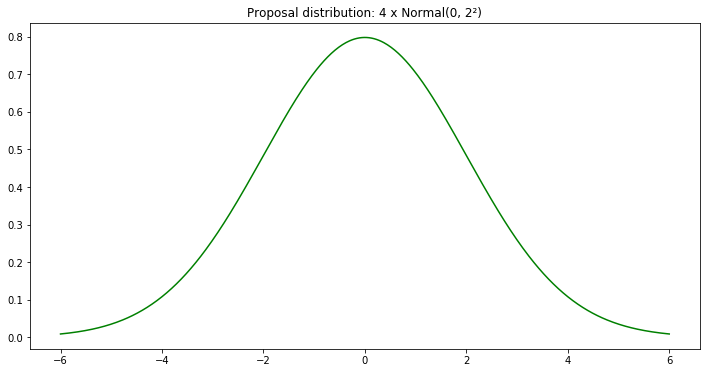

In [3]:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 6, 500)
plot_y = 4 * sts.norm(0, 2).pdf(plot_x)
plt.plot(plot_x, plot_y, 'g-')
plt.title('Proposal distribution: 4 x Normal(0, 2²)')
plt.show()

## Step 2: Draw samples under the proposal distribution

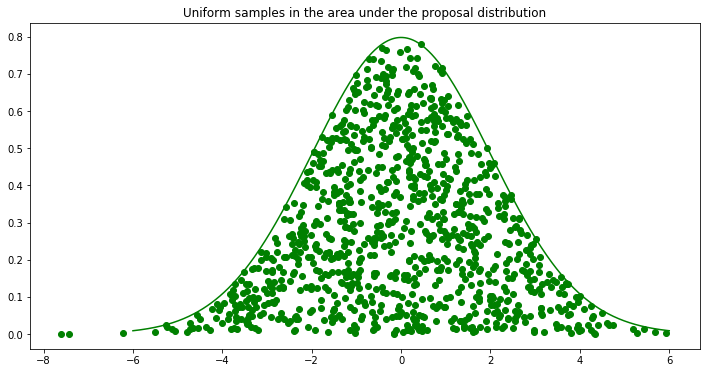

In [10]:
# Draw samples that are uniformly distributed in the area under the
# unnormalized proposal distribution.
num_samples = 1000
proposal_samples = sts.norm(0, 2).rvs(size=num_samples)
proposal_heights = sts.uniform(0, 4 * sts.norm.pdf(proposal_samples, 0, 2)).rvs(size=num_samples)

# Plot the proposal distribution and the samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 6, 500)
plot_y = 4 * sts.norm(0, 2).pdf(plot_x)
plt.plot(plot_x, plot_y, 'g-')
plt.plot(proposal_samples, proposal_heights, 'go')
plt.title('Uniform samples in the area under the proposal distribution')
plt.show()

## Step 3: Keep only those samples are under the nasty curve

* We can evaluate the nasty function at the sample values.
* Check whether the height of the sample value is less than the height of the nasty curve at the sample value.

Accepted 299 out of 1000 samples


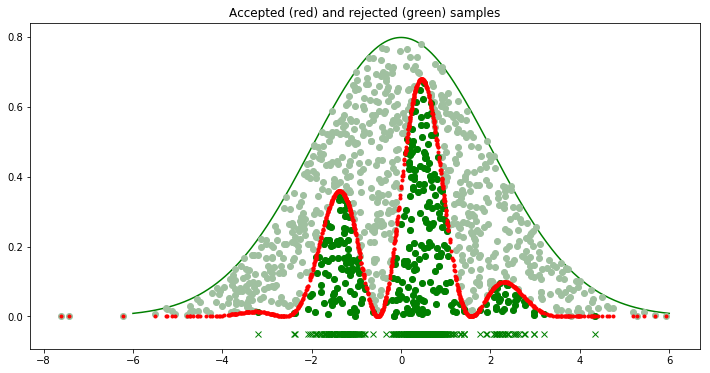

In [11]:
true_heights = nasty(proposal_samples)
accepted_samples = proposal_samples[proposal_heights <= true_heights]
accepted_heights = proposal_heights[proposal_heights <= true_heights]
print('Accepted', len(accepted_samples), 'out of', num_samples, 'samples')

# Plot accepted (red) and rejected (green) samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 6, 500)
plot_y = 4 * sts.norm(0, 2).pdf(plot_x)
plt.plot(plot_x, plot_y, 'g-')
plt.plot(proposal_samples, proposal_heights, 'o', color='#a0c0a0')
plt.plot(accepted_samples, accepted_heights, 'go')
plt.plot(accepted_samples, [-0.05] * len(accepted_samples), 'gx')
plt.plot(proposal_samples, true_heights, 'r.')
plt.title('Accepted (red) and rejected (green) samples')
plt.show()

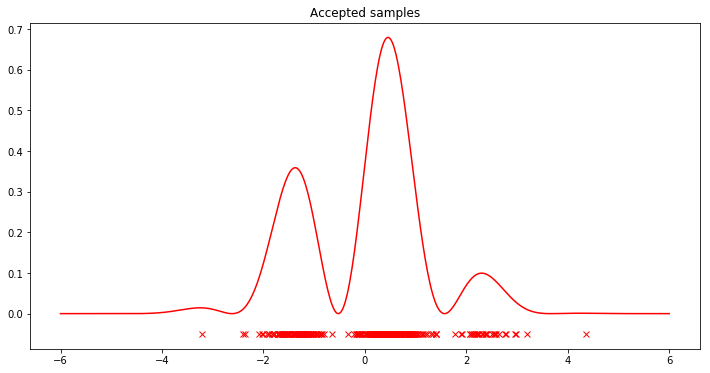

In [12]:
# Plot accepted (red) and rejected (green) samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 6, 500)
plot_y = nasty(plot_x)
plt.plot(plot_x, plot_y, 'r-')
plt.plot(accepted_samples, [-0.05] * len(accepted_samples), 'rx')
plt.title('Accepted samples')
plt.show()